# 5. Limpieza de los datos

Tras es análisis de la variables hemos detectado tanto duplicidades en los datos como presencia de datos faltantes. Procedemos a la limpieza de los datos para la posterior construcción de un modelo mas exacto. 

En primer lugar, cargamos todas las librerias necesarias y el archivo de código. 


## 5.1 Eliminacion de duplicados

En el análisis de las variables cualitativas obsevamos que algunos datos tenian la misma dirección y precio.
Basándonos en este razonamiento, buscamos las  filas que tengan las variables 'Suburb', 'Address','Postcode'y 'CouncilArea' iguales y también en las que las variables "Adress", " Prices" y "Date" coincidan. 
Con le objetivo de no eliminar datos que no estuvieran duplicados mantuvimos los que se encontraban solo en uno de los dataframes. 


In [1]:
import pandas as pd 
data = pd.read_csv('Melbourne_housing_FULL.csv')
%run -i fundamentos_datos_variables.py
data_duplicados=eliminar_duplicados(data)
print("El número de datos duplicados eliminados es", ((len(data))-(len(data_duplicados))))

El número de datos duplicados eliminados es 8309


## 5.2 Detección e Imputación de Datos Faltantes

Una vez eliminiados los datos duplicados, para finalizar la preparación de los datos es necesario eliminar los datos faltantes. 

Para ellos en primer lugar representamos gráficamente los datos faltantes en cada una de las variables realizando  una función de visualización. 


Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6280
Bathroom          6286
Car               6655
Landsize          9049
BuildingArea     16204
YearBuilt        14804
CouncilArea          3
Lattitude         6097
Longtitude        6097
Regionname           3
Propertycount        3
dtype: int64


<Figure size 216x252 with 0 Axes>

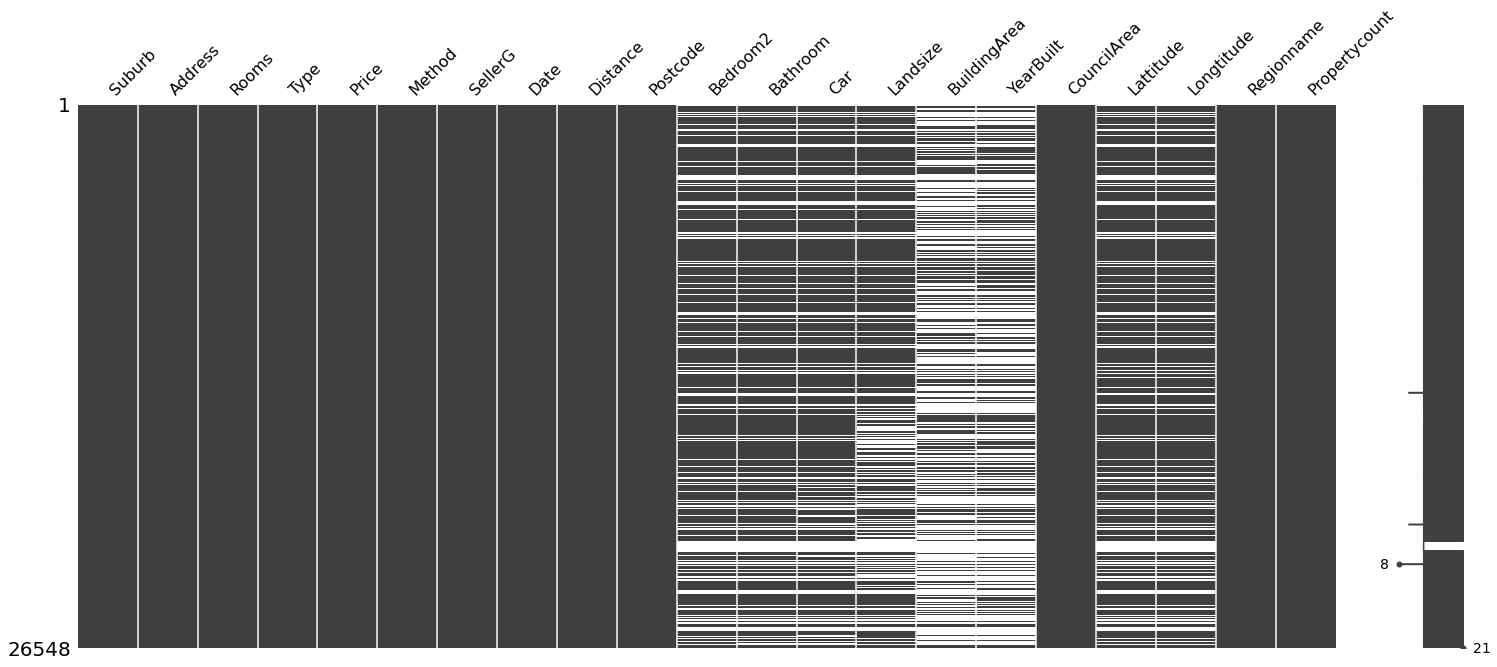

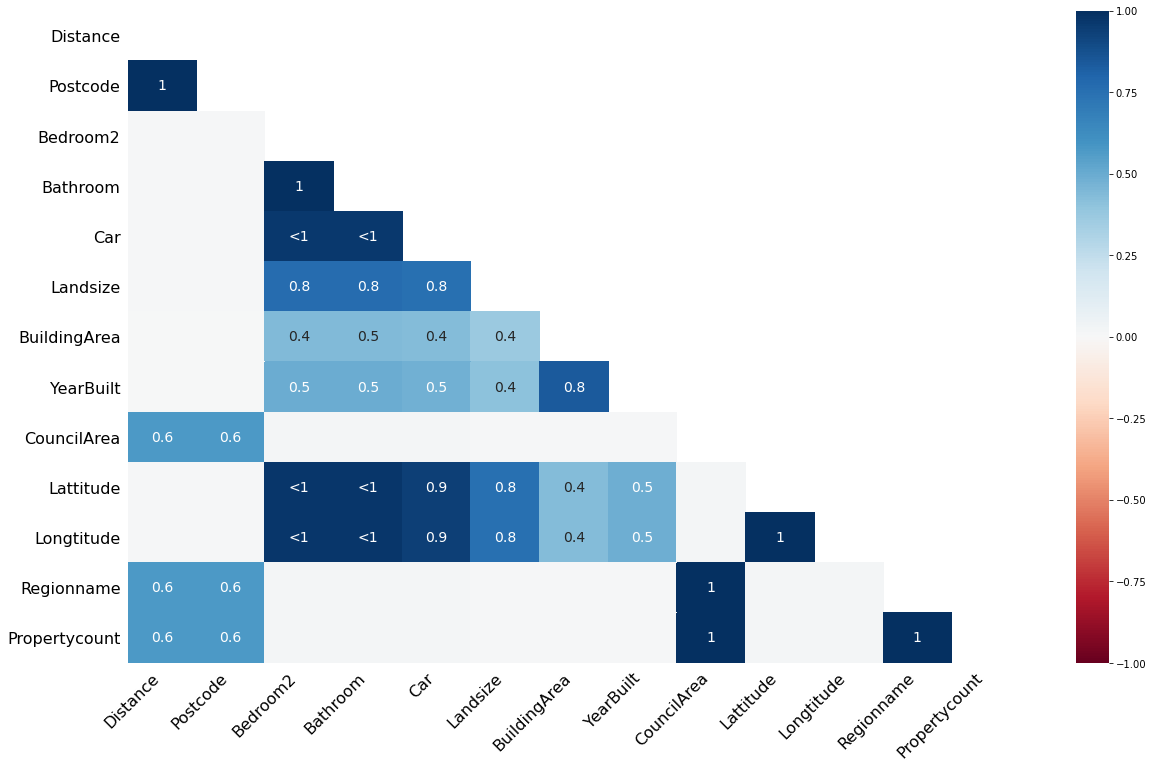

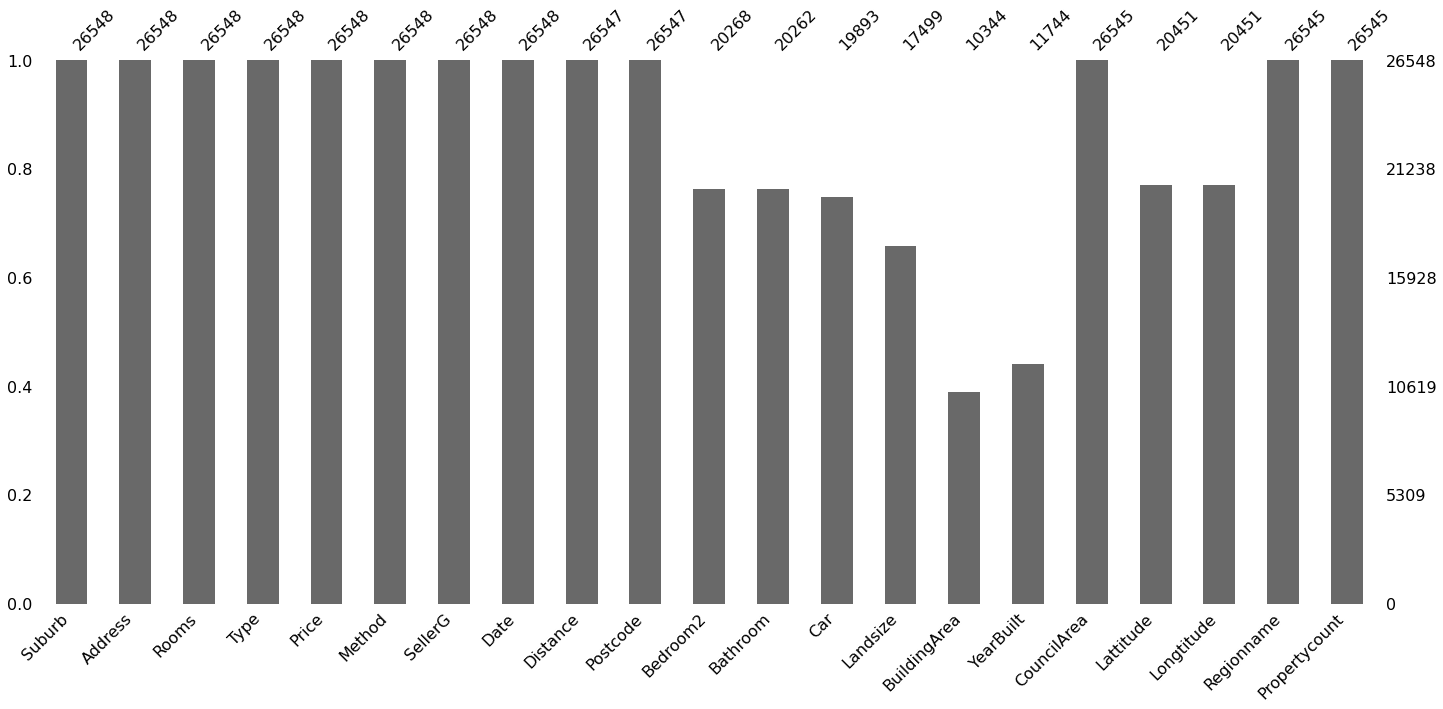

In [2]:
%run -i fundamentos_datos_missings.py
visualizacion_missings(data_duplicados)

Se detecta que hay variables donde no existen datos faltantes mientras que en otras el número es muy alto, como vimos en el EDA inicial.

En este punto es importante seleccionar de forma adecuada la imputación de los mismo. Directamente descartamos las variables "YearBuilt", "BuildingArea" y "Bedroom2" ya que presentan muchos datos faltantes, además de una baja correlación y/o muchas similitud con otras variables como en el caso de "Bedrooms2" y "rooms". 


Por otro, lado procedemos a imputar los datos restantes, para ellos realizaremos una función que complete los datos fataltantes usando un modelo de regresiñon lineal o random forest, en función de cual de los dos es más adecuado. 

En primer lugar, usamos la función "Kfold()" para separar nuestros datos en 5 partes, usaremos 4 como training y una como test.  Cada una de las variables tendrá por lo tanto  4 grupos diferentes para realizar la regresión lineal y el random forest, usaremos estos modelos para cálcular la media de los errores cuadráticos del resultado de ambos modelos con el grupo "test". 

Finalmente, la función selecciona el mejor modelo y con el completa los datos faltantes en el dataframe de cada una de las variables. Para mejorar la exactitud del modelo cada vez que una variable es completada se incluye dentro de los modelos para ser usada en el cálculo de las siguientes variables.  

Unnamed: 0          0
Suburb              0
Address             0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


<Figure size 216x252 with 0 Axes>

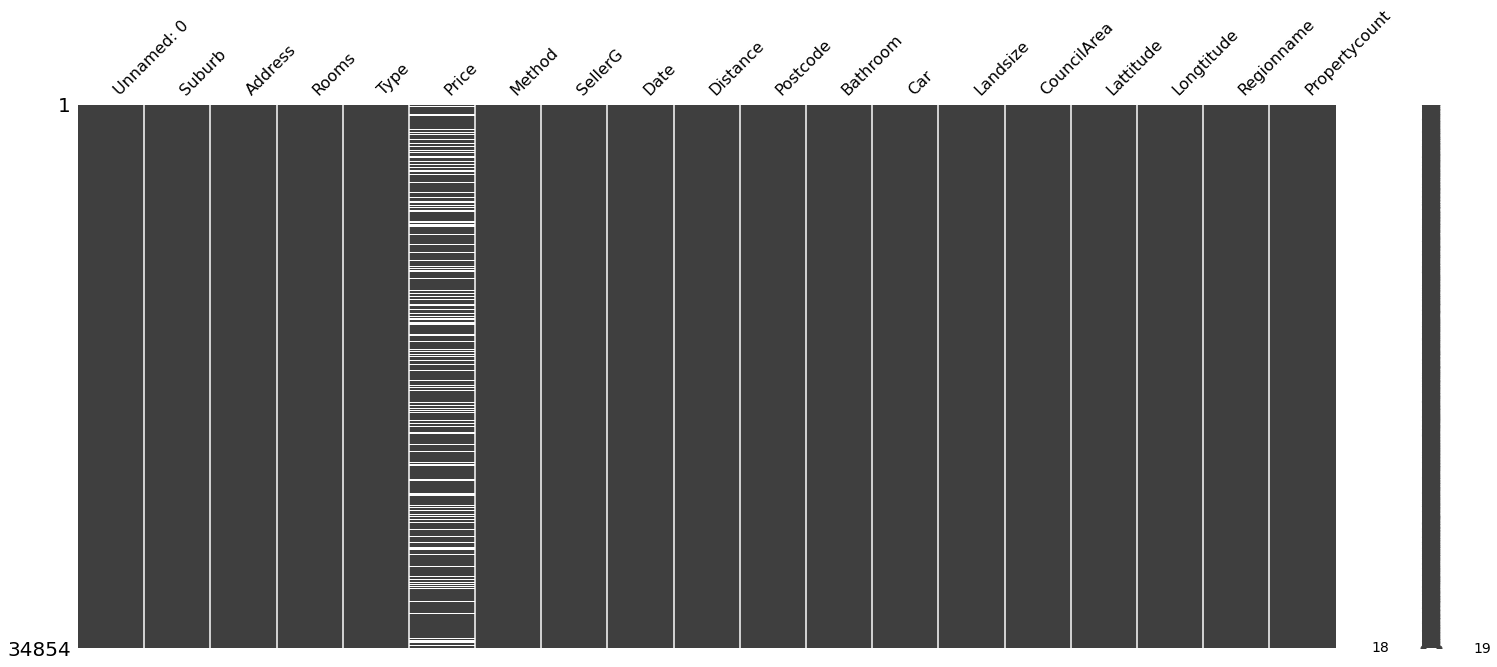

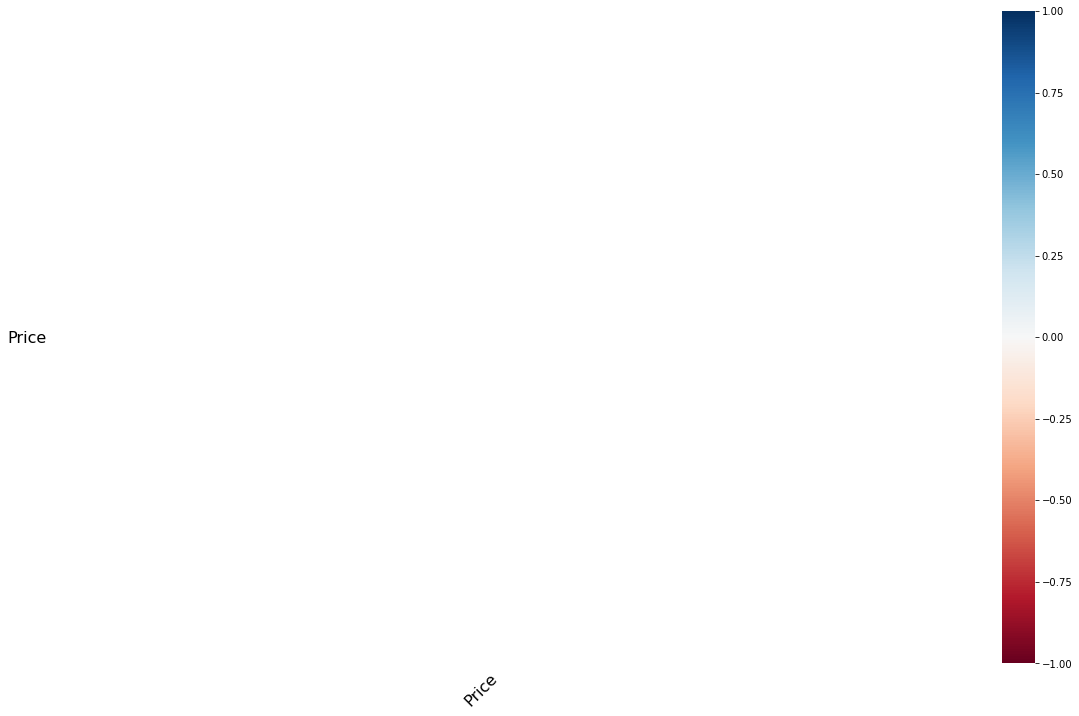

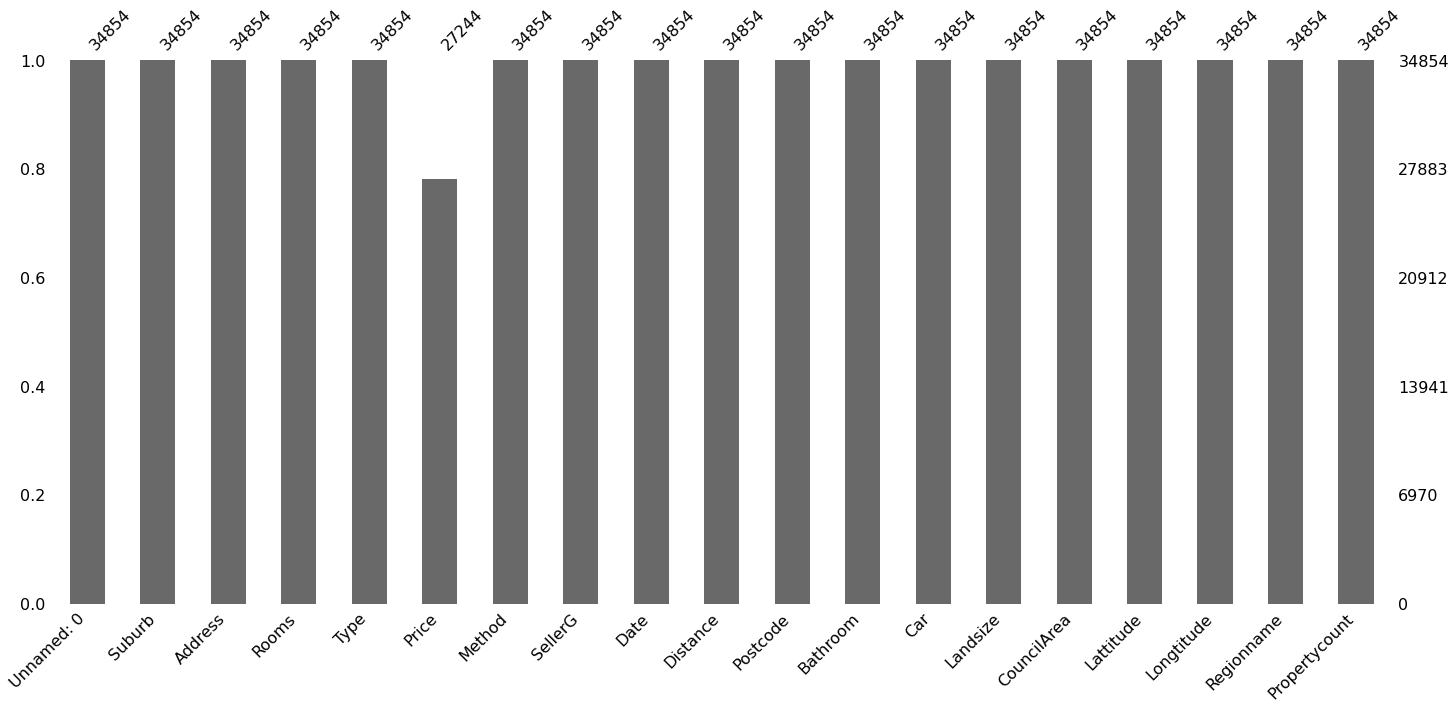

In [3]:
data_no_missings = pd.read_csv('precios_casas_sinduplicados_indexTRUE.csv')

data_no_missings["Price"]=data["Price"]

#Eliminamos los missings restantes 
dataframe=data_no_missings.dropna(subset=['Distance']) 
dataframe=dataframe.dropna(subset=['Regionname']) 
dataframe=dataframe.dropna(subset=['Regionname']) 
dataframe=dataframe.dropna(subset=['CouncilArea']) 
dataframe=dataframe.dropna(subset=['Propertycount']) 
dataframe=dataframe.dropna(subset=['Postcode'])

visualizacion_missings(dataframe)

In [4]:
dataframe.to_csv("Seleccion_variables.csv")